In [2]:
import numpy as np
import matplotlib.pyplot as plt      
from mpl_toolkits import mplot3d

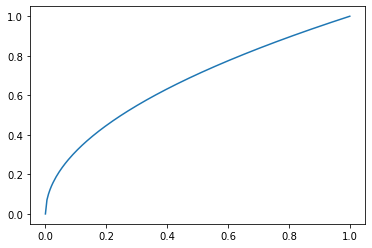

In [14]:
plt.figure()

plt.plot(np.linspace(0, 1.0, 200),np.linspace(0,1.0, 200)**(0.5))
# plt.plot(np.linspace(0, 0.5, 200),np.exp(-5* (np.linspace(0, 0.5, 200))))
plt.show()

In [23]:
def generate_traj(fish_pos,target_pos,dist_to_path,visualize=False):
    ## will return line_start_positions
    x0 = [fish_pos[0],fish_pos[2]]
    xt= [target_pos[0],target_pos[2]]
    d = dist_to_path
    a = xt[0]-x0[0]
    b = xt[1]-x0[1]
    c = x0[0]**2+x0[1]**2-x0[0]*xt[0]-x0[1]*xt[1]-d*d
    print(a,b,c)
    
    p=x0[0]
    q=x0[1]
    r =d 
    hasSOl=True
    
    if np.isclose(b,0):
        k=-c/a
        A=1
        B=-2*q
        C = p*p+q*q+k*k-2*k*p-r*r
        delta = B*B-4*A*C
        print(A,B,C)
        if delta<0:
            x = None
            y = None
            hasSOl=False
        elif delta>0:
            y = np.array([(-B+np.sqrt(delta))/(2*A),(-B-np.sqrt(delta))/(2*A)])
            x =np.array([k,k])
        else:
            y = np.array([-B/(2*A)])
            x =np.array([k])
    else:
        m=-a/b
        c=-c/b
        A=m*m+1
        B=2*(m*c-m*q-p)
        C=q*q-r*r+p*p-2*c*q+c*c
        delta = B*B-4*A*C
        if delta<0:
            x = None
            y = None
            hasSOl=False
        elif delta>0:
            x = np.array([(-B+np.sqrt(delta))/(2*A),(-B-np.sqrt(delta))/(2*A)])
            y =m*x+c
        else:
            x = np.array([-B/(2*A)])
            y=m*x+c
            
    if visualize:
        plt.figure()
        plt.scatter(x0[0],x0[1])
        plt.scatter(xt[0],xt[1])
        theta = np.linspace(0, 2 * np.pi, 200)
        plt.plot( d*np.cos(theta)+x0[0],d*np.sin(theta)+x0[1],color="darkred")
        plt.scatter(x,y,color='blue')
        if hasSOl:
            for i in range(x.shape[0]):
                plt.plot([xt[0],x[i]],[xt[1],y[i]],color='green')
        else:
            print("no such lines")
        plt.axis("equal")
        plt.show()
#         if hasSOl:
#             for i in range(x.shape[0]):
#                 print( (x[i]-x0[0])*(x[i]-xt[0])+(y[i]-x0[1])*(y[i]-xt[1]))
    print(x,y)
    return (hasSOl,np.stack([x,y],axis=1))

In [24]:
x0 = np.array([ 1.18213071e-01,  2.80715732e-04, -2.59946415e-08])
xt = np.array([ 1.11821307e+00,  2.80715732e-04, -2.59946415e-08])
d = 0


0.9999999989999999 0.0 -0.11821307088178692
1 5.1989283e-08 6.765421556309548e-16
no such lines


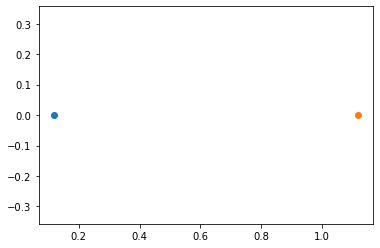

None None


AxisError: axis 1 is out of bounds for array of dimension 1

In [25]:
hasSol,point = generate_traj(x0,xt,d,visualize=True)

In [5]:
print(point)

[[-0.  0.]]


In [ ]:

a = xt[0]-x0[0]
b = xt[1]-x0[1]
c = x0[0]**2+x0[1]**2-x0[0]*xt[0]-x0[1]*xt[1]-d*d
m=-a/b
c=-c/b
p=x0[0]
q=x0[1]
r =d 

In [ ]:
A=m*m+1
B=2*(m*c-m*q-p)
C=q*q-r*r+p*p-2*c*q+c*c
delta = B*B-4*A*C
hasSOl=True
if delta<0:
    x = None
    y = None
    hasSOl=False
elif delta>0:
    x = np.array([(-B+np.sqrt(delta))/(2*A),(-B-np.sqrt(delta))/(2*A)])
    y=m*x+c
else:
    x = np.array([-B/(2*A)])
    y=m*x+c

In [ ]:
plt.figure()
plt.scatter(x0[0],x0[1])
plt.scatter(xt[0],xt[1])
theta = np.linspace(0, 2 * np.pi, 200)
plt.plot( d*np.cos(theta)+x0[0],d*np.sin(theta)+x0[1],color="darkred")
plt.scatter(x,y,color='blue')
if hasSOl:
    for i in range(x.shape[0]):
        plt.plot([xt[0],x[i]],[xt[1],y[i]],color='green')
else:
    print("no such lines")
plt.axis("equal")
plt.show()
if hasSOl:
    for i in range(x.shape[0]):
        print( (x[i]-x0[0])*(x[i]-xt[0])+(y[i]-x0[1])*(y[i]-xt[1]))


In [ ]:
range_start=-0.5
range_end =0.5
gamma = 15
sample_num=10000

x=np.arange(range_start,range_end,step=(range_end-range_start)/sample_num)
y = np.exp(-gamma*np.abs(x))

plt.figure()
plt.plot(x,y)
plt.show()